## CNN으로 컬러 이미지 (CIFAR-10) 다중 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'AppleGothic'

In [16]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 50000개의 32x32 컬러 이미지
# test 데이터는 2차원으로 되어있음
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape) 

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [17]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print(y_train.shape, y_test.shape)

(50000,) (10000,)


In [18]:
pd.Series(y_train).value_counts().sort_index()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64

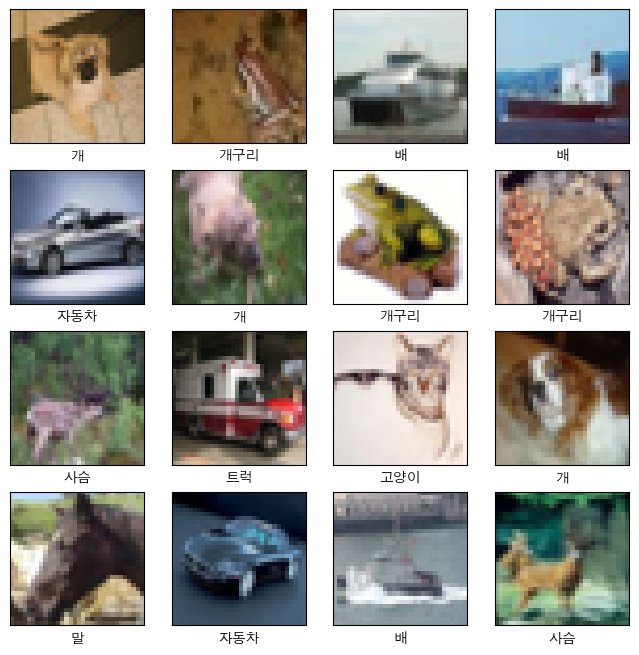

In [10]:
samples = np.random.randint(50000, size=16)

feature_mapping = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

plt.figure(figsize=(8,8))

for i, idx in enumerate(samples):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx])
    plt.xlabel(feature_mapping[y_train[idx]])

In [19]:
# train, validate 분리

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

In [20]:
# 정규화

x_train_s = x_train / 255
x_val_s = x_val / 255
x_test_s = x_test / 255

In [21]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)
y_test_o = to_categorical(y_test)

In [25]:
# 모델 생성

from keras import layers

# filters : 필터의 개수
# kernel_size : 필터의 크기 (3,3) or 3
# padding : 경계 처리 방법 same - 입력과 출력의 크기가 같도록 설정 | valid - 유효한 영역만 출력
# pool_size : 풀링의 크기 (2,2) or 2
# strides : 필터를 적용하는 간격 (2,2) or 2
# activation : 활성화 함수
# input_shape : 입력 형태 (행, 열, 채널 수) 흑백이면 (28,28,1) 컬러면 (28,28,3)
# Dropout : 과적합 방지를 위해 뉴런을 랜덤하게 꺼주는 것
# Flatten : 다차원의 데이터를 1차원으로 바꿔주는 것 (FC layer에 넣기 위해)
model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# 첫번째 레이어 Param 개수 -> 448
# 16 * 9 * 3 + 16
# 16개의 필터, 필터 사이즈(3x3), 3개의 채널, 16개의 bias

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o))

Epoch 1/20


2024-01-02 13:36:13.629112: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 [==============================] - 8s 6ms/step - loss: 1.5942 - accuracy: 0.4297 - val_loss: 1.3983 - val_accuracy: 0.4984
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2869 - accuracy: 0.5425 - val_loss: 1.2240 - val_accuracy: 0.5662
Epoch 3/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1684 - accuracy: 0.5858 - val_loss: 1.1348 - val_accuracy: 0.5995
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0827 - accuracy: 0.6197 - val_loss: 1.0884 - val_accuracy: 0.6169
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0211 - accuracy: 0.6421 - val_loss: 1.0672 - val_accuracy: 0.6276
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9693 - accuracy: 0.6589 - val_loss: 1.0423 - val_accuracy: 0.6335
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9290 - accuracy: 0.6748 - val_loss: 1.0504 - val_accuracy: 0.6335
Epo

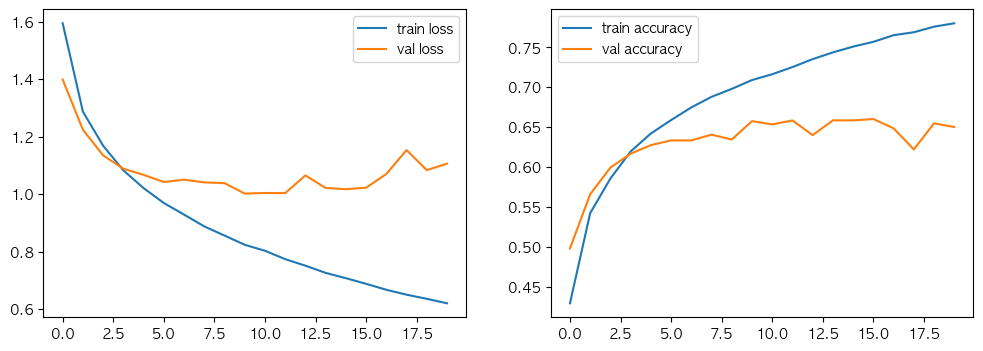

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'], label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='val loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], label='train accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val accuracy')
plt.legend()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_accuracy(model:keras.Sequential, test_y:np.ndarray):
    pred_y = model.predict(x_test_s)
    pred_y = np.argmax(pred_y, axis=1)
    print("accuracy :", accuracy_score(test_y, pred_y))
    print("precision :", precision_score(test_y, pred_y, average='macro'))
    print("recall :", recall_score(test_y, pred_y, average='macro'))
    print("f1 :", f1_score(test_y, pred_y, average='macro'))

print_accuracy(model, y_test)

313/313 [==============================] - 1s 2ms/step
accuracy : 0.6613
precision : 0.6606910105681598
recall : 0.6613
f1 : 0.6573633405476803


In [33]:
# Dropout 추가

model2 = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o))

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6594 - accuracy: 0.3918 - val_loss: 1.3475 - val_accuracy: 0.5226
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3908 - accuracy: 0.4972 - val_loss: 1.2958 - val_accuracy: 0.5269
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2977 - accuracy: 0.5324 - val_loss: 1.1767 - val_accuracy: 0.5756
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2366 - accuracy: 0.5565 - val_loss: 1.1496 - val_accuracy: 0.5906
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1941 - accuracy: 0.5734 - val_loss: 1.0837 - val_accuracy: 0.6148
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1489 - accuracy: 0.5891 - val_loss: 1.0823 - val_accuracy: 0.6160
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1114 - accuracy: 0.6024 - val_loss: 1.0428 - val_accuracy:

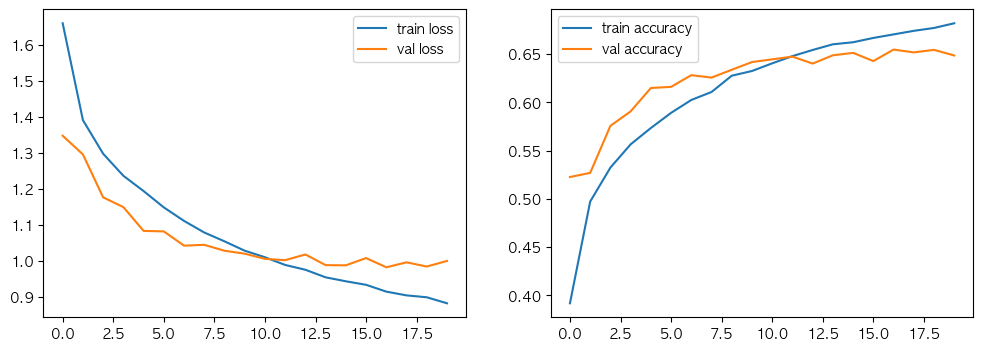

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history2.epoch, history2.history['loss'], label='train loss')
plt.plot(history2.epoch, history2.history['val_loss'], label='val loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.epoch, history2.history['accuracy'], label='train accuracy')
plt.plot(history2.epoch, history2.history['val_accuracy'], label='val accuracy')
plt.legend()

plt.show()

In [38]:
print_accuracy(model2, y_test)

313/313 [==============================] - 1s 2ms/step
accuracy : 0.6561
precision : 0.6651087040527723
recall : 0.6561
f1 : 0.6576061078964395


In [ ]:
# Callbacks

# EarlyStopping : val_loss가 더 이상 감소하지 않으면 학습을 중단
# ModelCheckpoint : val_loss가 감소할 때마다 모델을 저장
# ReduceLROnPlateau : val_loss가 감소하지 않으면 학습률을 감소시킴

In [39]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

ckpt_path = './models/ckpt/cifar10.ckpt'
ckpt_checkpoint = ModelCheckpoint(ckpt_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

history3 = model2.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o), callbacks=[ckpt_checkpoint])

Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 0.8737 - accuracy: 0.6859
Epoch 1: val_loss improved from inf to 0.98833, saving model to ./models/ckpt/cifar10.ckpt
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8737 - accuracy: 0.6859 - val_loss: 0.9883 - val_accuracy: 0.6559
Epoch 2/20
1250/1250 [==============================] - ETA: 0s - loss: 0.8706 - accuracy: 0.6849
Epoch 2: val_loss did not improve from 0.98833
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8706 - accuracy: 0.6849 - val_loss: 1.0231 - val_accuracy: 0.6478
Epoch 3/20
1244/1250 [============================>.] - ETA: 0s - loss: 0.8599 - accuracy: 0.6893
Epoch 3: val_loss did not improve from 0.98833
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8596 - accuracy: 0.6895 - val_loss: 0.9941 - val_accuracy: 0.6603
Epoch 4/20
1248/1250 [============================>.] - ETA: 0s - loss: 0.8539 - accuracy: 0.6903
Epoch 4: val_loss did no

In [40]:
model2.load_weights(ckpt_path)
print_accuracy(model2, y_test)

313/313 [==============================] - 1s 2ms/step
accuracy : 0.653
precision : 0.6514963601652037
recall : 0.653
f1 : 0.6483518289338139


In [41]:
ckpt_early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1) # patience : val_loss가 5번 이상 감소하지 않으면 학습을 중단

history4 = model2.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o), callbacks=[ckpt_early_stopping])

Epoch 1/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8714 - accuracy: 0.6837 - val_loss: 1.0020 - val_accuracy: 0.6546
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8608 - accuracy: 0.6882 - val_loss: 0.9990 - val_accuracy: 0.6550
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8552 - accuracy: 0.6926 - val_loss: 0.9989 - val_accuracy: 0.6583
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8440 - accuracy: 0.6913 - val_loss: 1.0013 - val_accuracy: 0.6545
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8369 - accuracy: 0.6964 - val_loss: 1.0112 - val_accuracy: 0.6543
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8280 - accuracy: 0.7003 - val_loss: 1.0072 - val_accuracy: 0.6574
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8227 - accuracy: 0.6980 - val_loss: 1.0030 - val_accuracy:

In [42]:
# factor : val_loss가 5번 이상 감소하지 않으면 학습률을 0.1배로 감소시킴
# min_lr : 학습률의 하한선
chpt_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-5) 

history5 = model2.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o), callbacks=[chpt_reduce_lr])

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8089 - accuracy: 0.7036 - val_loss: 1.0528 - val_accuracy: 0.6424 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8029 - accuracy: 0.7099 - val_loss: 1.0474 - val_accuracy: 0.6481 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7935 - accuracy: 0.7097 - val_loss: 1.0383 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7904 - accuracy: 0.7107 - val_loss: 1.0478 - val_accuracy: 0.6478 - lr: 0.0010
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7872 - accuracy: 0.7122 - val_loss: 1.0506 - val_accuracy: 0.6470 - lr: 0.0010
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7806 - accuracy: 0.7139 - val_loss: 1.0287 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 7/20
1250/1250 [==============================] - 7s

In [43]:
chpt_all = [ckpt_checkpoint, ckpt_early_stopping, chpt_reduce_lr]

history6 = model2.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o), callbacks=chpt_all)

Epoch 1/20
1246/1250 [============================>.] - ETA: 0s - loss: 0.6314 - accuracy: 0.7631
Epoch 1: val_loss did not improve from 0.98833
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6318 - accuracy: 0.7631 - val_loss: 1.0737 - val_accuracy: 0.6607 - lr: 1.0000e-05
Epoch 2/20
1242/1250 [============================>.] - ETA: 0s - loss: 0.6273 - accuracy: 0.7662
Epoch 2: val_loss did not improve from 0.98833
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6274 - accuracy: 0.7660 - val_loss: 1.0743 - val_accuracy: 0.6621 - lr: 1.0000e-05
Epoch 3/20
1249/1250 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7687
Epoch 3: val_loss did not improve from 0.98833
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6269 - accuracy: 0.7687 - val_loss: 1.0752 - val_accuracy: 0.6619 - lr: 1.0000e-05
Epoch 4/20
1242/1250 [============================>.] - ETA: 0s - loss: 0.6267 - accuracy: 0.7668
Epoch 4: val_loss

In [44]:
model2.load_weights(ckpt_path)

print_accuracy(model2, y_test)

313/313 [==============================] - 1s 2ms/step
accuracy : 0.653
precision : 0.6514963601652037
recall : 0.653
f1 : 0.6483518289338139


## 층을 더 깊게

In [ ]:
model3 = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val_s, y_val_o))